In the lecture labeled as lecture 11, there is an example featuring an Air conditioner. Your task is to create a system based on this example using one of the 3 models for Inference that were presented.

Assignment Overview
In this assignment, you will be implementing a rule-based system in uncertain environments based on the example discussed in lecture 11. The example features an Air conditioner, and you will create a system using one of the 3 models for Inference that were presented.

Steps to Complete the Assignment
Review lecture 12 to understand the example featuring the Air conditioner.
Choose one of the 3 models for Inference that were presented in the lecture.
Identify the rules and conditions from the example that can be used to create the system.
Write the code in a jupyter notebook based on the chosen model for inference, incorporating the rules and conditions from the example (you can hardcode the numerical values).
Test the system with different values to ensure it functions correctly.
Document the process and the reasoning behind your choices. (important for evaluation)
Submit your solution to the assignment on MSTeams (one juptyer notebook file).

In [1]:
#I choose Mamdani method since I need to classify wether the power output of the air conditioner is low, constant or high

def cold(x):
    if x <= 10:
        return 1
    if x >= 25:
        return 0
    return 1- (x - 10)/15

def normal(x):
    if x <= 15:
        return 0
    if x >= 55:
        return 0
    if x <= 30:
        return (x - 15)/15
    return 1 - (x - 30)/25

def hot(x):
    if x <= 35:
        return 0
    if x >= 55:
        return 1
    return (x - 35)/20

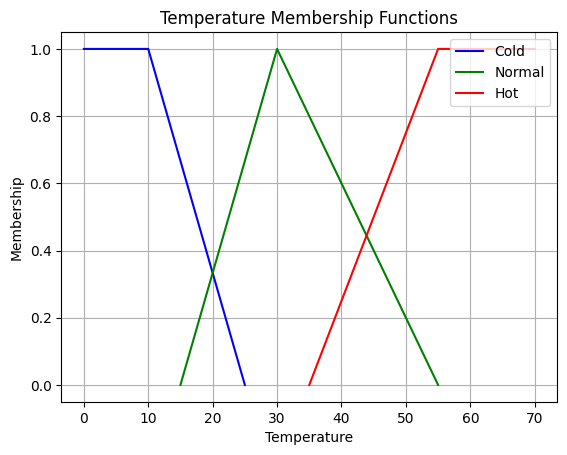

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the temperature range
x_values = np.arange(0, 71, 1)

# Calculate the function values
cold_values = [cold(x) for x in x_values]
normal_values = [normal(x) for x in x_values]
hot_values = [hot(x) for x in x_values]

# Plot the functions
plt.figure()
plt.plot(x_values[0:26], cold_values[0:26], 'b', linewidth=1.5, label='Cold')
plt.plot(x_values[15:56], normal_values[15:56], 'g', linewidth=1.5, label='Normal')
plt.plot(x_values[35:], hot_values[35:], 'r', linewidth=1.5, label='Hot')
plt.title('Temperature Membership Functions')
plt.ylabel('Membership')
plt.xlabel('Temperature')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [3]:
def humidity_small(x):
    if x <= 0.5:
        return 1
    if x >= 1.5:
        return 0
    return 1 - (x - 0.5)

def humidity_large(x):
    if x <= 1:
        return 0
    if x >= 1.6:
        return 1;
    return (x - 1)/0.6



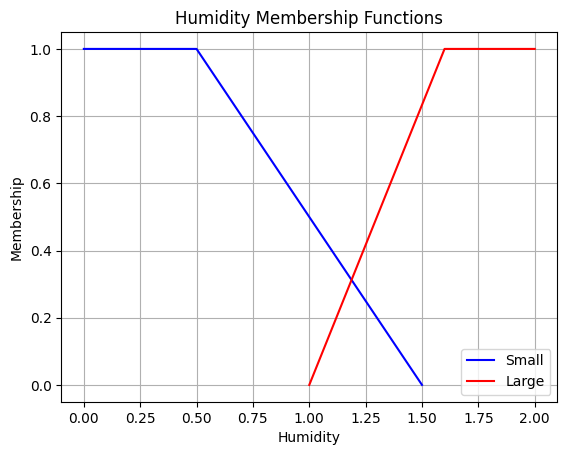

In [4]:
# Define the humidity range
x_values = np.arange(0, 2.1, 0.1)

# Calculate the function values
humidity_small_values = [humidity_small(x) for x in x_values]
humidity_large_values = [humidity_large(x) for x in x_values]

# Plot the functions
plt.figure()
plt.plot(x_values[0:16], humidity_small_values[0:16], 'b', linewidth=1.5, label='Small')
plt.plot(x_values[10:], humidity_large_values[10:], 'r', linewidth=1.5, label='Large')
plt.title('Humidity Membership Functions')
plt.ylabel('Membership')
plt.xlabel('Humidity')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [5]:
# If temperature is cold and humidity is small, then power is low
def rule_1(x,y):
    return min(cold(x), humidity_small(y))
# If temperature is normal or humidity is small, then power is constant
def rule_2(x,y):
    return max(normal(x), humidity_small(y))
# If temperature is hot or humidity is large, then power is high
def rule_3(x,y):
    return max(hot(x), humidity_large(y))


In [6]:
machine_power_values = np.arange(0, 101, 1)

# Define the output membership functions
def low(x):
    if x <= 20:
        return 1
    if x >= 40: 
        return 0
    return 1 - (x - 20)/20

def constant(x):
    if x == 50:
        return 1
    if x <= 30 or x >= 70:
        return 0
    if x < 50:
        return (x - 30)/20
    return 1 - (x - 50)/20

def high(x):
    if x <= 60:
        return 0
    if x >= 80:
        return 1
    return (x - 60)/20


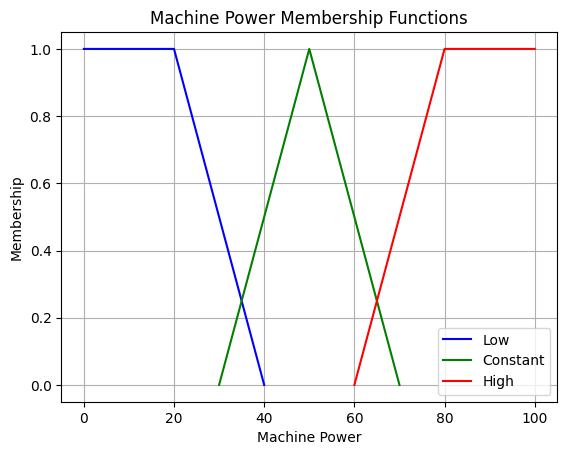

In [7]:
# Define the machine power range
x_values = np.arange(0, 101, 1)
power=["low","constant","high"]
# Calculate the function values
low_values = [low(x) for x in x_values]
constant_values = [constant(x) for x in x_values]
high_values = [high(x) for x in x_values]

# Plot the functions
plt.figure()
plt.plot(x_values[0:41], low_values[0:41], 'b', linewidth=1.5, label='Low')
plt.plot(x_values[30:71], constant_values[30:71], 'g', linewidth=1.5, label='Constant')
plt.plot(x_values[60:], high_values[60:], 'r', linewidth=1.5, label='High')
plt.title('Machine Power Membership Functions')
plt.ylabel('Membership')
plt.xlabel('Machine Power')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() 



Temperature:  20
Temperature is cold:  0.33333333333333337
Temperature is normal:  0.3333333333333333
Temperature is hot:  0
Humidity:  0.75
Humidity is small:  0.75
Humidity is large:  0
Machine Power Low:  0.33333333333333337
Machine Power Constant:  0.75
Machine Power High:  0
Defuzzified result:  37.41885108756274


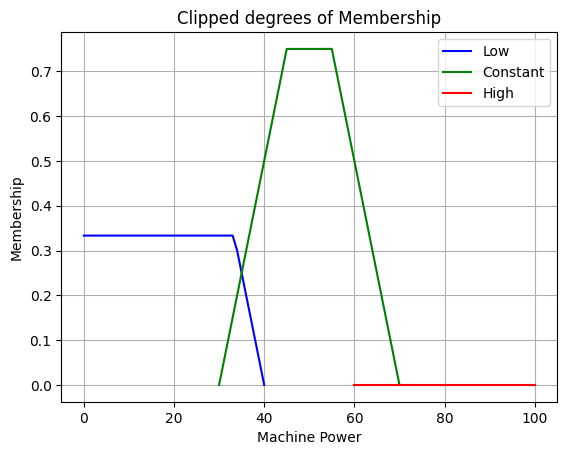

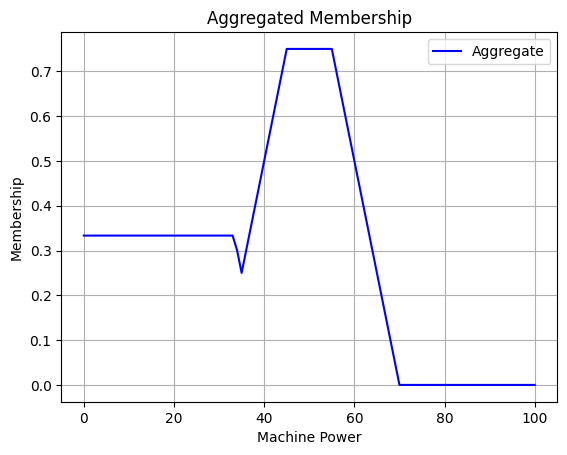

In [8]:


# Plot the clipped membership functions
# X IS TEMPERATURE
# Y IS HUMIDITY


x = 20
y = 0.75


# CHANGE HERE FOR DIFFERENT VALUES



r1_result = rule_1(x, y)
r2_result = rule_2(x, y)
r3_result = rule_3(x, y)

x_values = np.arange(0, 101, 1)

print("Temperature: ", x)
print("Temperature is cold: " , cold(x))
print("Temperature is normal: ", normal(x))
print("Temperature is hot: ", hot(x))
print("Humidity: ", y)
print("Humidity is small: ", humidity_small(y))
print("Humidity is large: ", humidity_large(y))

print("Machine Power Low: ", r1_result)
print("Machine Power Constant: ", r2_result)
print("Machine Power High: ", r3_result)

# Now we need to agregate the results, just take the maximum between the clipped membership functions
aggregate = [max( min(low(x), r1_result), min(constant(x), r2_result), min(high(x), r3_result)) for x in x_values]




# Now we need to defuzzify the result, we get a reasonable estimate for the center of gravity
# By calculating the sum of the product of the membership function and the value of the function
# divided by the sum of the membership function
defuzzified = sum([x * aggregate[x] for x in range(101)]) / sum(aggregate)
print("Defuzzified result: ", defuzzified)

# We display the clipped degrees of membership, clipped because it has easier computation than scaled
plt.figure()
plt.plot(x_values[0:41], [min(low(x), r1_result) for x in x_values][0:41], 'b', linewidth=1.5, label='Low')
plt.plot(x_values[30:71], [min(constant(x), r2_result) for x in x_values][30:71], 'g', linewidth=1.5, label='Constant')
plt.plot(x_values[60:], [min(high(x), r3_result) for x in x_values][60:], 'r', linewidth=1.5, label='High')
plt.title('Clipped degrees of Membership')
plt.ylabel('Membership')
plt.xlabel('Machine Power')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



plt.figure()
plt.plot(x_values, aggregate, 'b', linewidth=1.5, label='Aggregate')
plt.title('Aggregated Membership')
plt.ylabel('Membership')
plt.xlabel('Machine Power')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

